In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
%load_ext tensorboard

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 43s 0us/step


In [5]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

In [7]:
X_train.shape, X_valid.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

In [8]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
import os
if "ANN" in os.path.abspath(os.curdir): os.chdir("..")
BASE_DIR = os.path.abspath(os.curdir)
BASE_DIR

'D:\\programs\\TheCompleteML\\projects'

In [11]:
if "ANN" not in os.path.abspath(os.curdir): 
    os.chdir(os.path.abspath(os.path.join(os.curdir, "ANN")))

In [42]:
run_index = 1 # increment this at every run
learning_rate = 3e-3

logdir = os.path.join(BASE_DIR, "logs", "dnn_cifar10_logs")
run_logdir = os.path.join(logdir, "run_{:03d}_lr_{:.6f}".format(run_index, learning_rate))
model_path = os.path.join(BASE_DIR, "models", "cifar10_{:06f}".format(learning_rate))

model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=20)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [43]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=learning_rate), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [44]:
callbacks = [model_checkpoint_cb, early_stopping, tensorboard_cb]

In [15]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 113s 76ms/step - loss: 3.2808 - sparse_categorical_accuracy: 0.1902 - val_loss: 2.2000 - val_sparse_categorical_accuracy: 0.2108
Epoch 2/10
1407/1407 [==============================] - 108s 77ms/step - loss: 1.9742 - sparse_categorical_accuracy: 0.2728 - val_loss: 1.9455 - val_sparse_categorical_accuracy: 0.2820
Epoch 3/10
1407/1407 [==============================] - 108s 77ms/step - loss: 1.8735 - sparse_categorical_accuracy: 0.3200 - val_loss: 1.8451 - val_sparse_categorical_accuracy: 0.3272
Epoch 4/10
1407/1407 [==============================] - 101s 72ms/step - loss: 1.8160 - sparse_categorical_accuracy: 0.3419 - val_loss: 1.7892 - val_sparse_categorical_accuracy: 0.3548
Epoch 5/10
1407/1407 [==============================] - 112s 79ms/step - loss: 1.7589 - sparse_categorical_accuracy: 0.3627 - val_loss: 1.7398 - val_sparse_categorical_accuracy: 0.3752
Epoch 6/10
1407/1407 [==============================] - 107s 76ms/step - lo

In [45]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 113s 78ms/step - loss: 24.8036 - sparse_categorical_accuracy: 0.1025 - val_loss: 2.3412 - val_sparse_categorical_accuracy: 0.1008
Epoch 2/10
1407/1407 [==============================] - 109s 77ms/step - loss: 2.3173 - sparse_categorical_accuracy: 0.0976 - val_loss: 2.3155 - val_sparse_categorical_accuracy: 0.0962
Epoch 3/10
1407/1407 [==============================] - 107s 76ms/step - loss: 2.3168 - sparse_categorical_accuracy: 0.1007 - val_loss: 2.3165 - val_sparse_categorical_accuracy: 0.1012
Epoch 4/10
1407/1407 [==============================] - 107s 76ms/step - loss: 2.3181 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.3202 - val_sparse_categorical_accuracy: 0.0960
Epoch 5/10
1407/1407 [==============================] - 106s 76ms/step - loss: 2.3177 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.3139 - val_sparse_categorical_accuracy: 0.0990
Epoch 6/10
1407/1407 [==============================] - 103s 73ms/step - l

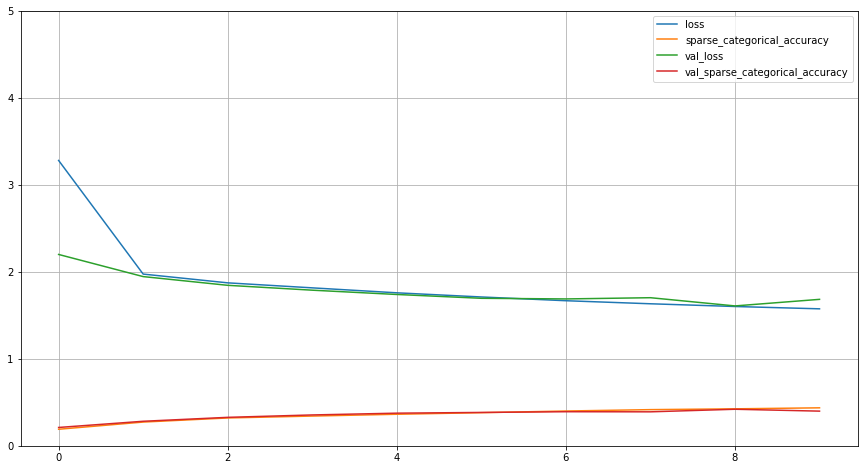

In [28]:
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for i in range(20):
    model.add(keras.layers.Dense(100, 
                                kernel_initializer=keras.initializers.he_normal, 
                                activation=keras.activations.elu))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, 
                            activation="softmax",
                            kernel_initializer=keras.initializers.glorot_uniform))

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

##### Observations

Convergence to optimum value is much more effective compare to precious result but the time complexity is high, and oveall accuracy is also improved.

### Implementing SELU as activations functions

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(-1, 32, 32, 3)
X_valid = scaler.transform(X_valid.reshape(-1, 1)).reshape(-1, 32, 32, 3)
X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(-1, 32, 32, 3)

In [ ]:
X_train.shape

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="selu",
                                 kernel_initializer=keras.initializers.lecun_normal))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999),
             metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))